In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.linalg import inv

### Ex 2

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv')
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


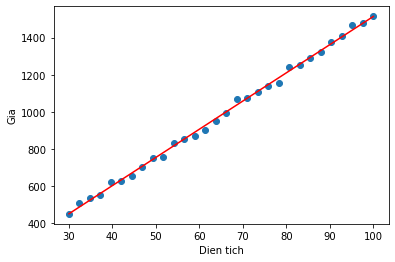

In [16]:
x = data['Diện tích']
y = data['Giá']
plt.xlabel('Dien tich')
plt.ylabel('Gia')

a,b = np.polyfit(x, y, 1)
Y = a*x + b
plt.scatter(x,y)
plt.plot(x, Y, color='red')

In [17]:
print(a,b)

15.211090799670435 -7.064268645245209


=> Model: Y = 15.211 * Dien tich + (-7.064)

In [18]:
predict = np.poly1d((a, b))
S = [50, 100, 150]
for i in S: 
    print(f'Nhà có diện tích {i} mét vuông có giá ${predict(i)}')

Nhà có diện tích 50 mét vuông có giá $753.4902713382766
Nhà có diện tích 100 mét vuông có giá $1514.0448113217983
Nhà có diện tích 150 mét vuông có giá $2274.59935130532


### Ex 3

In [19]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values
N = boston.shape[0]

In [21]:
y = y.reshape(-1, 1)


In [22]:
ones = np.ones(shape=N).reshape(-1,1)
X = np.concatenate((ones, X), 1)
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
coef = inv(X.T @X)@X.T @y
coef

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])